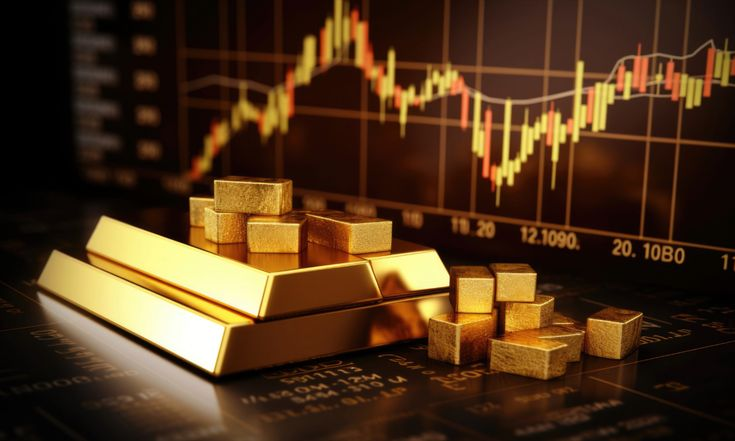

The Gold Price Prediction Project aims to forecast future gold prices using historical data and machine learning models. By analyzing factors such as global economic indicators, interest rates, currency values, and previous gold prices, the project builds a predictive model to estimate future trends. The goal is to assist investors and analysts in making data-driven decisions.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

* **yfinance**

Project focuses on retrieving and analyzing financial market data using the yfinance Python library. This tool allows users to download historical stock prices, financial statements, and real-time market data from Yahoo Finance. The project is commonly used for stock analysis, portfolio tracking, and building predictive financial models based on reliable market data.

In [ ]:
gold = yf.download("GC=F", start = "2015-01-01", end = "2025-01-01")
gold_copy = gold.copy()

gold.reset_index(inplace = True)
gold = gold[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# remove null values
gold.dropna(inplace = True)

gold.head(15)

[*********************100%***********************]  1 of 1 completed


Price,Date,Open,High,Low,Close,Volume
Ticker,,GC=F,GC=F,GC=F,GC=F,GC=F
0,2015-01-02,1184.000000,1194.500000,1169.500000,1186.000000,138
1,2015-01-05,1180.300049,1206.900024,1180.099976,1203.900024,470
2,2015-01-06,1203.500000,1220.000000,1203.500000,1219.300049,97
3,2015-01-07,1219.199951,1219.199951,1210.599976,1210.599976,29
4,2015-01-08,1207.000000,1215.699951,1206.300049,1208.400024,92
5,2015-01-09,1211.099976,1220.199951,1210.300049,1216.000000,43
6,2015-01-12,1224.199951,1234.400024,1219.099976,1232.699951,100
7,2015-01-13,1239.199951,1239.300049,1230.300049,1234.300049,20
8,2015-01-14,1229.599976,1243.800049,1225.599976,1234.400024,21


It downloads historical gold price data from Yahoo Finance for the period between January 1, 2015, and January 1, 2025. It resets the index to make the date a column, selects only relevant columns, removes rows with missing values, and displays the first 15 rows of the cleaned data.

In [ ]:
gold.isnull().sum()

,,0
Price,Ticker,
Date,,0
Open,GC=F,0
High,GC=F,0
Low,GC=F,0
Close,GC=F,0
Volume,GC=F,0


Alternatively, we can use "*.isna().sum()* ", there is no difference between them.

Eventually, **we don't have any NULL values**.

In [ ]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        2513 non-null   datetime64[ns]
 1   (Open, GC=F)    2513 non-null   float64       
 2   (High, GC=F)    2513 non-null   float64       
 3   (Low, GC=F)     2513 non-null   float64       
 4   (Close, GC=F)   2513 non-null   float64       
 5   (Volume, GC=F)  2513 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 117.9 KB


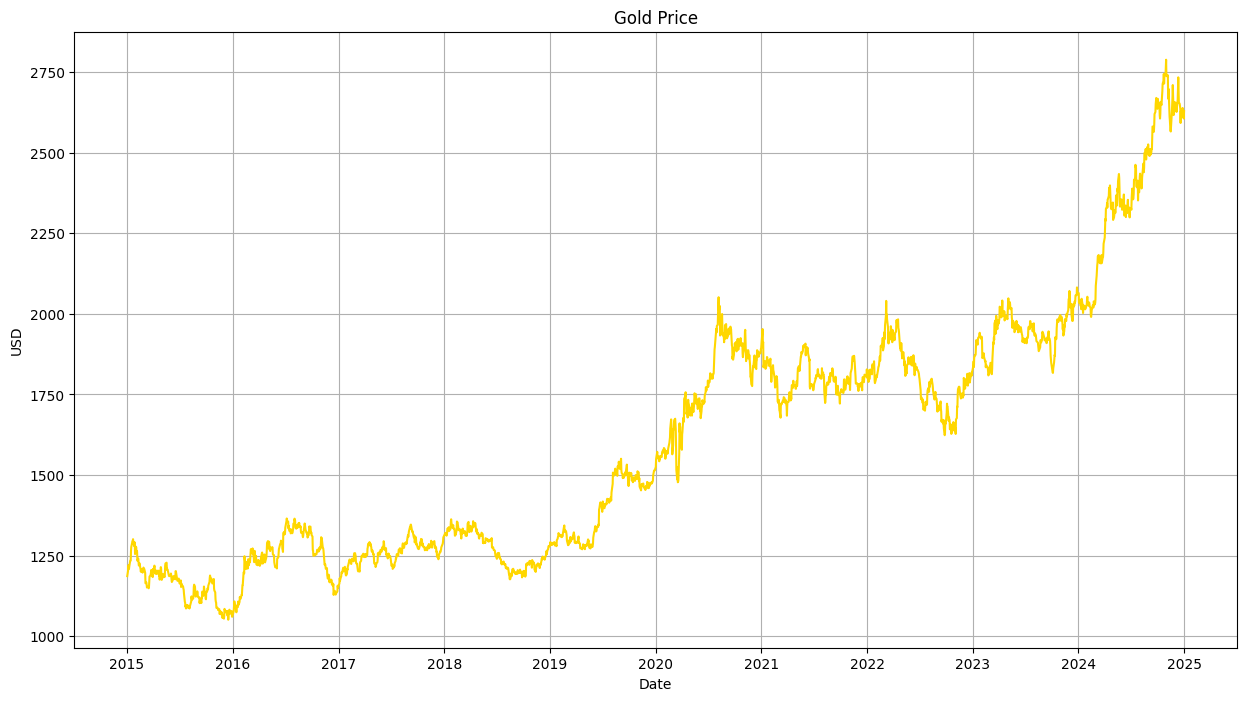

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(gold['Date'], gold['Close'], color = 'gold')
plt.title("Gold Price")
plt.xlabel("Date")
plt.ylabel("USD")
plt.grid(True)
plt.show()

It creates a line plot showing the gold closing prices over time. The x-axis represents the date, the y-axis shows the price in USD, and the line is colored gold. The plot includes a title, axis labels, and a grid for better readability.

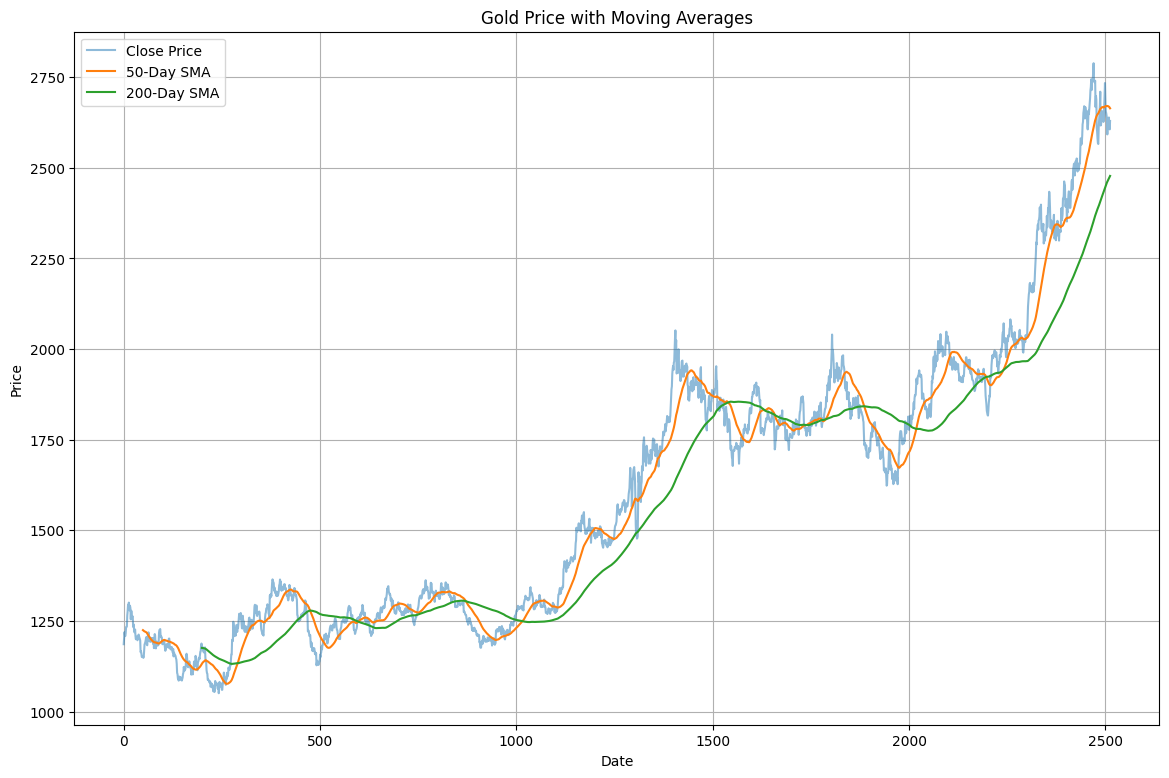

In [ ]:
gold['SMA_50'] = gold['Close'].rolling(window = 50).mean()
gold['SMA_200'] = gold['Close'].rolling(window = 200).mean()

plt.figure(figsize = (14, 9))
plt.plot(gold['Close'], label = 'Close Price', alpha = 0.5)
plt.plot(gold['SMA_50'], label = '50-Day SMA')
plt.plot(gold['SMA_200'], label = '200-Day SMA')
plt.title('Gold Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

It calculates the 50-day and 200-day Simple Moving Averages (SMA) of gold closing prices to show price trends over time. It then plots the original closing prices along with both SMAs. The result is a visual comparison of short-term and long-term trends, helping to identify potential signals in the gold market.

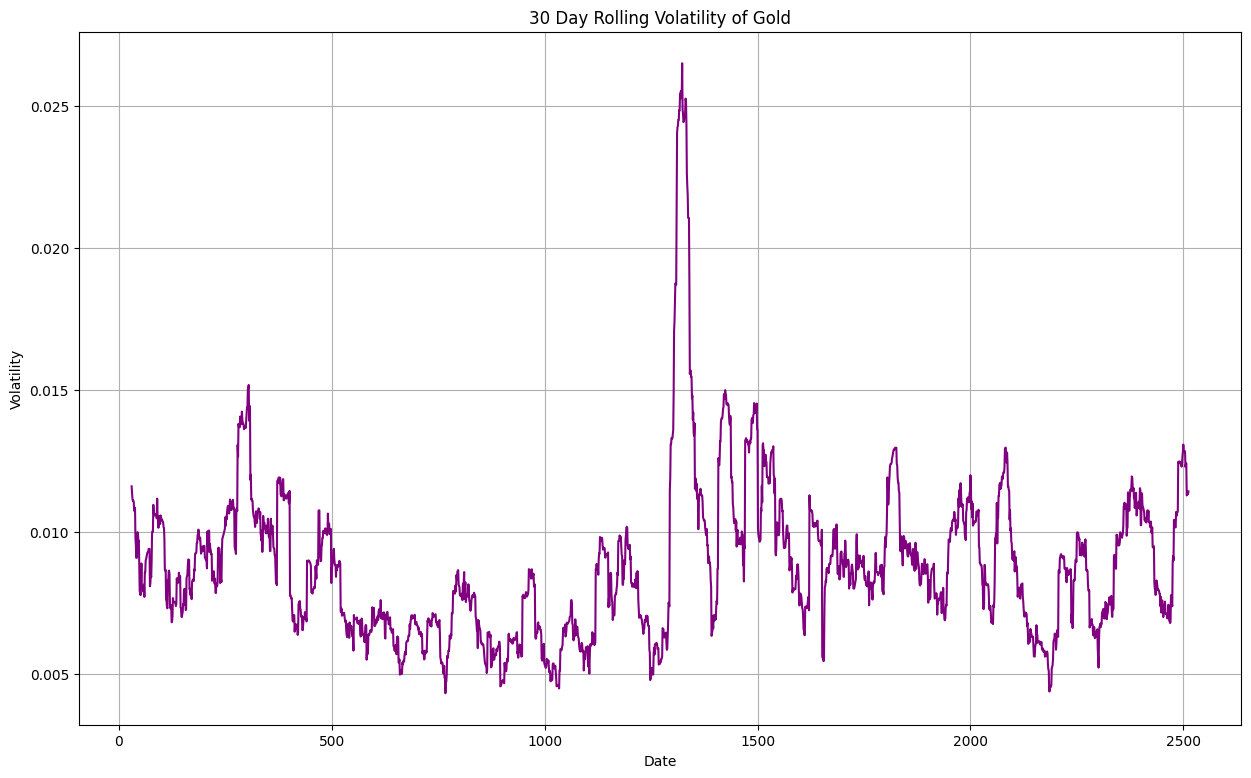

In [ ]:
gold['Daily Return'] = gold['Close'].pct_change()
gold['Volatility'] = gold['Daily Return'].rolling(window = 30).std()

plt.figure(figsize = (15, 9))
plt.plot(gold['Volatility'], color = 'purple')
plt.title('30 Day Rolling Volatility of Gold')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

It calculates the daily return of gold prices and then computes the 30-day rolling standard deviation to measure volatility. It visualizes how the gold market's volatility changes over time, helping to identify periods of high or low price fluctuations.

[*********************100%***********************]  4 of 4 completed


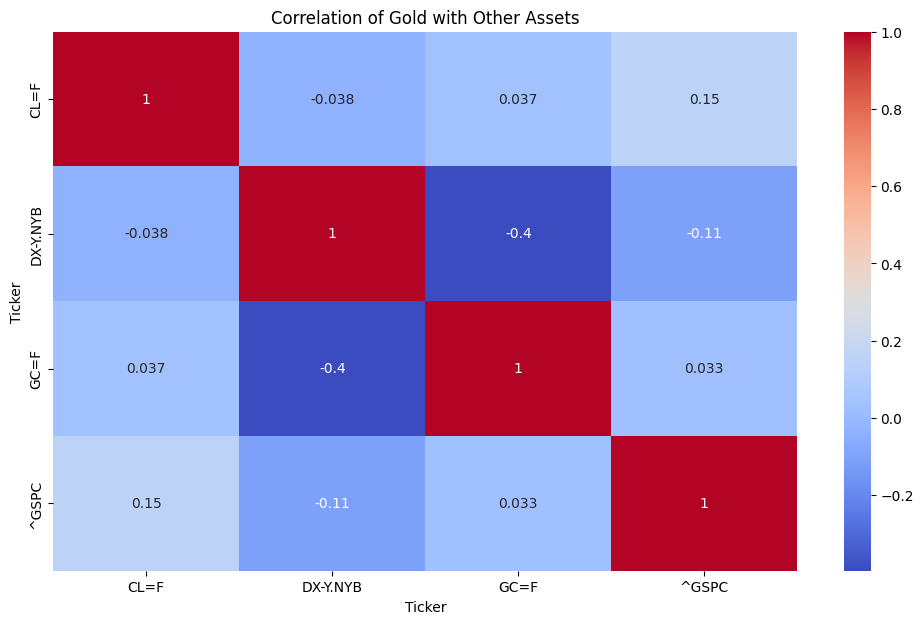

In [ ]:
assets = ['GC=F', 'CL=F', '^GSPC', 'DX-Y.NYB']
data = yf.download(assets, start = "2015-01-01", end = "2025-01-01")['Close']
returns = data.pct_change().dropna()

plt.figure(figsize = (12,7))
sns.heatmap(returns.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation of Gold with Other Assets")
plt.show()

It downloads the closing prices of gold, crude oil, the S&P 500 index, and the U.S. dollar index from 2015 to 2025. It calculates their daily returns and plots a heatmap to show the correlation between these assets. This helps to analyze how gold's price movement relates to other major financial assets.

In [ ]:
gold['Year'] = gold['Date'].dt.year
gold['Month'] = gold['Date'].dt.month
gold['Day'] = gold['Date'].dt.day
gold['DayOfWeek'] = gold['Date'].dt.dayofweek

# remove Date column
gold.drop(columns = ['Date'], inplace = True)

gold['PriceChange'] = gold['Close'] - gold['Open']
gold['Range'] = gold['High'] - gold['Low']
gold['AveragePrice'] = (gold['High'] + gold['Low']) / 2

gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Open, GC=F)      2513 non-null   float64
 1   (High, GC=F)      2513 non-null   float64
 2   (Low, GC=F)       2513 non-null   float64
 3   (Close, GC=F)     2513 non-null   float64
 4   (Volume, GC=F)    2513 non-null   int64  
 5   (SMA_50, )        2464 non-null   float64
 6   (SMA_200, )       2314 non-null   float64
 7   (Daily Return, )  2512 non-null   float64
 8   (Volatility, )    2483 non-null   float64
 9   (Year, )          2513 non-null   int32  
 10  (Month, )         2513 non-null   int32  
 11  (Day, )           2513 non-null   int32  
 12  (DayOfWeek, )     2513 non-null   int32  
 13  (PriceChange, )   2513 non-null   float64
 14  (Range, )         2513 non-null   float64
 15  (AveragePrice, )  2513 non-null   float64
dtypes: float64(11), int32(4), int64(1)
memory 

This code extracts year, month, day, and weekday from the Date column and then removes the original Date column. It also creates new features: daily price change (Close - Open), price range (High - Low), and average price ((High + Low) / 2). Finally, it displays the structure and summary of the updated dataset.

In [ ]:
# features and target
x = gold.drop(columns = 'Close', axis = 1)
y = gold['Close']

x.isnull().sum()

,,0
Price,Ticker,
Open,GC=F,0
High,GC=F,0
Low,GC=F,0
Volume,GC=F,0
SMA_50,,49
SMA_200,,199
Daily Return,,1
Volatility,,30
Year,,0


Null values after adding new columns because functions naturally introduce NaNs, especially in the first few rows. These occur because there’s no previous data point to compute from. Lastly, we can handle this by using df.dropna() to remove them or df.fillna() to fill.

<Axes: >

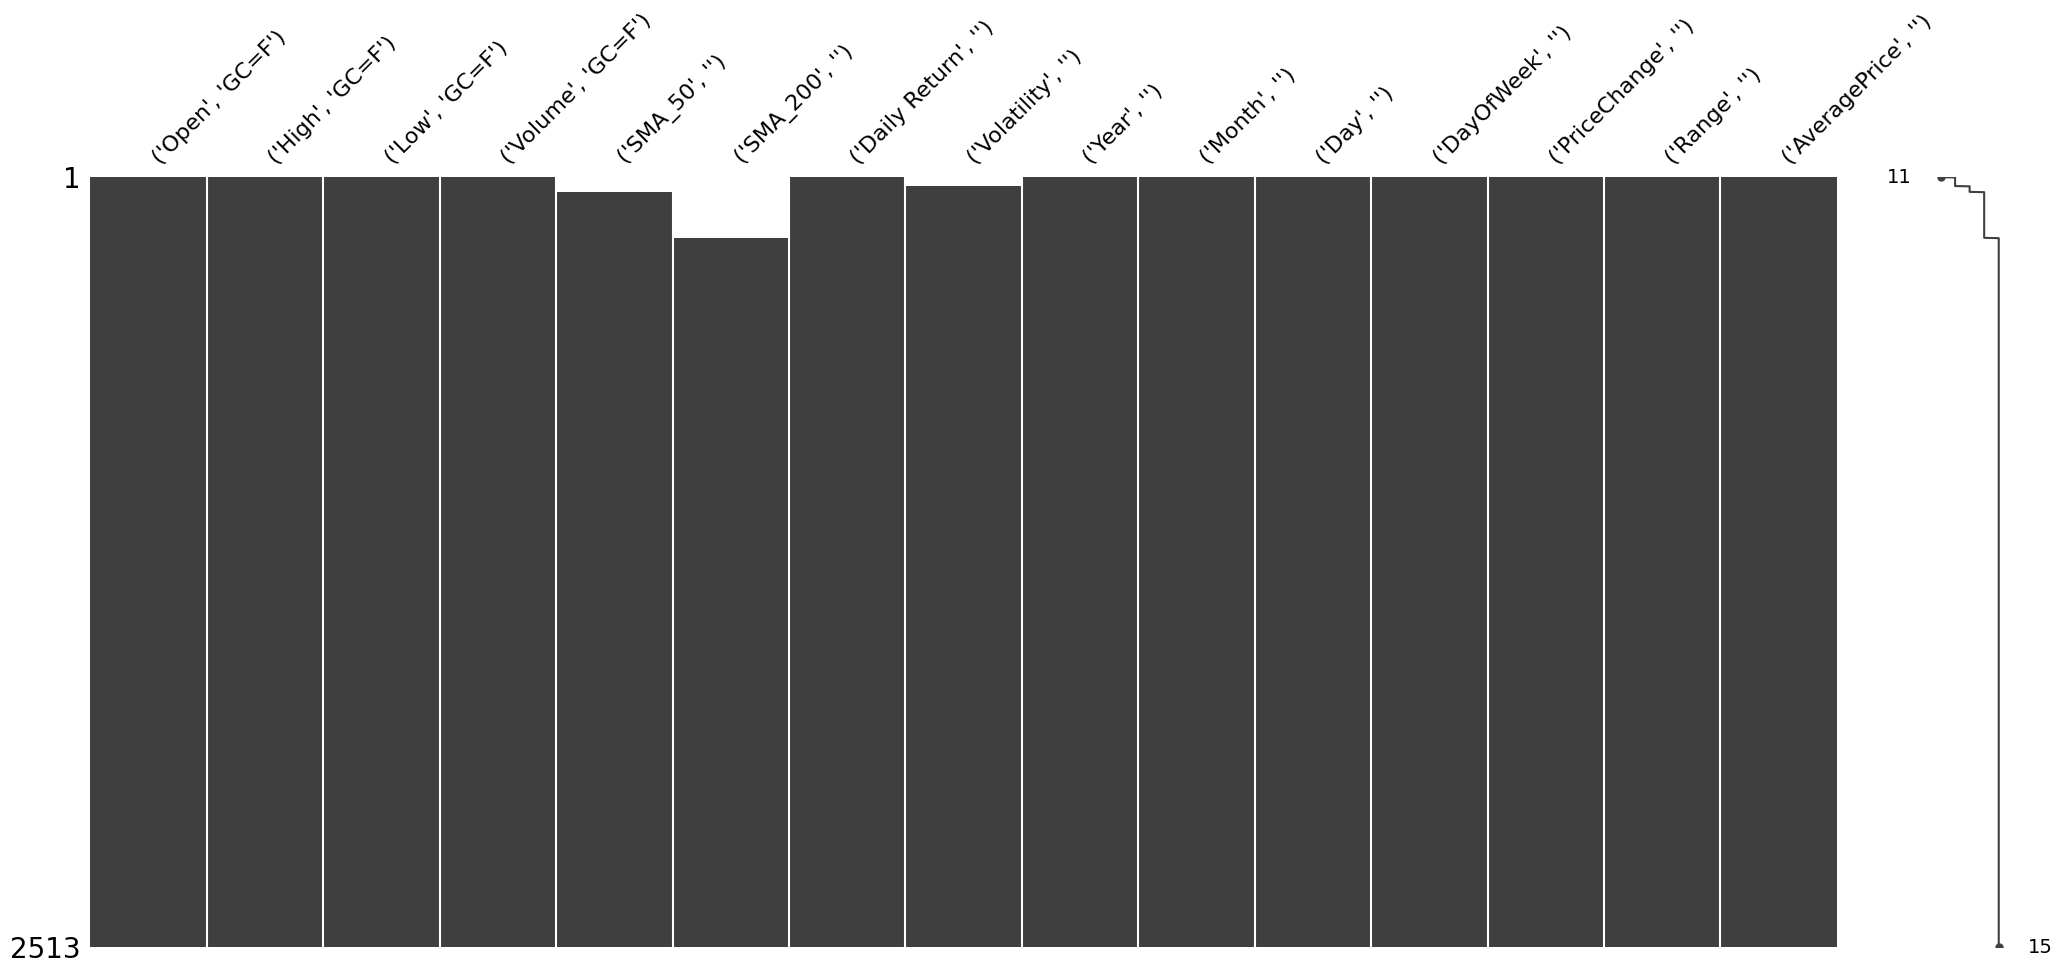

In [ ]:
ms.matrix(x)

*missingo* is a Python library used to quickly visualize and understand missing data patterns in a dataset through heatmaps, dendograms, bar charts, matrix plots, and so forth.

In [ ]:
x.fillna(x.median(), inplace = True)

x.isnull().sum()

,,0
Price,Ticker,
Open,GC=F,0
High,GC=F,0
Low,GC=F,0
Volume,GC=F,0
SMA_50,,0
SMA_200,,0
Daily Return,,0
Volatility,,0
Year,,0


In [ ]:
# divide data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# building 3 models

ridge = Ridge(alpha = 0.01)
lasso = Lasso(alpha = 0.01)
elastic = ElasticNet(alpha = 0.01, l1_ratio = 0.5)

ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
elastic.fit(x_train, y_train)

pred_ridge = ridge.predict(x_test)
pred_lasso = lasso.predict(x_test)
pred_elastic = elastic.predict(x_test)

In a nutshell,

1. **Ridge Regression**

Also known as L2 Regularization, and it prevents overfitting by penalizing large coefficients. Technically, it adds the *sum of squared coefficients* to the loss function.

2. **Lasso Regression**

Also known as L1 Regularization. It performs feature selection and prevent overfitting. Technically, it adds the *sum of absolute values* of the coefficients to the loss function.

3. **ElasticNet Regression**

It is a combination of Ridge (L2) and Lasso (L1), and it uses a weighted sum of L1 and L2 penalties. Thus, it is useful when there are many correlated features or when Lasso alone underperforms.

In [ ]:
# Evalutaion

def evaluate_model(name, y_test, pred):

    r2 = r2_score(y_test, pred)
    rmse = root_mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)

    print(f"{name}:\n")
    print(f"R2 Score: {r2}")
    print(f"RMSE:     {rmse}")
    print(f"MAE:      {mae}")
    print("----------------")

    return {'Model': name, 'R2': r2, 'RMSE': rmse, 'MAE': mae}

results = [ ]
results.append(evaluate_model("Ridge Regression", y_test, pred_ridge))
results.append(evaluate_model("Lasso Regression", y_test, pred_lasso))
results.append(evaluate_model("ElasticNet Regression", y_test, pred_elastic))

Ridge Regression:

R2 Score: 1.0
RMSE:     2.433739874198307e-06
MAE:      1.6214645884120577e-06
----------------
Lasso Regression:

R2 Score: 0.9999999984049637
RMSE:     0.015199765126030775
MAE:      0.011089246107952675
----------------
ElasticNet Regression:

R2 Score: 0.9999999989033139
RMSE:     0.01260354616846681
MAE:      0.00919426370058383
----------------


In shor,

- R² shows explanatory power,
- RMSE penalizes large errors more,
- MAE provides average error magnitude in a straightforward way.

In [ ]:
# Comparison

result = pd.DataFrame(results).sort_values(by = "R2", ascending = False)
display(result.style.background_gradient(cmap = 'RdYlGn'))

,Model,R2,RMSE,MAE
0,Ridge Regression,1.000000,0.000002,0.000002
2,ElasticNet Regression,1.000000,0.012604,0.009194
1,Lasso Regression,1.000000,0.015200,0.011089


It creates a DataFrame from a collection of model results, sorts the models by their R² score in descending order , and then displays the table with a color gradient. The gradient visually highlights the R² values, where green represents higher scores and red lower scores, making it easier to compare model performance at a glance.

In [ ]:
print(f"Lastly, The Best Model is {result.iloc[0]['Model']}")

Lastly, The Best Model is Ridge Regression


In concluison, we developed a robust ML pipeline to predict gold prices using historical data from 2015 to 2025. By engineering time-aware and market-based features, we prepared the dataset for effective regression modeling.

Furthermore, we implemented and compared three regularization techniques such as **Ridge**, **Lasso**, and **ElasticNet Regression**. Evaluation metrics such as **R2 score**, **RMSE**, and **MAE** were used to measure model performance on unseen test data.

Eventually,

* **Ridge Regression** outperformed the others with the **highest R² score** and lowest error metrics, indicating it was best suited for this type of data where all features contributed moderately to the prediction.
* **Lasso Regression** provided slightly lower performance due to aggressive coefficient shrinkage, potentially removing useful predictors.
* **ElasticNet** offered a balanced approach but still trailed Ridge in accuracy.

In [ ]:
# Finally

***I WOULD LIKE TO EXPRESS MY SINCERE GRATITUDE FOR YOUR TIME AND CONSIDERATION***

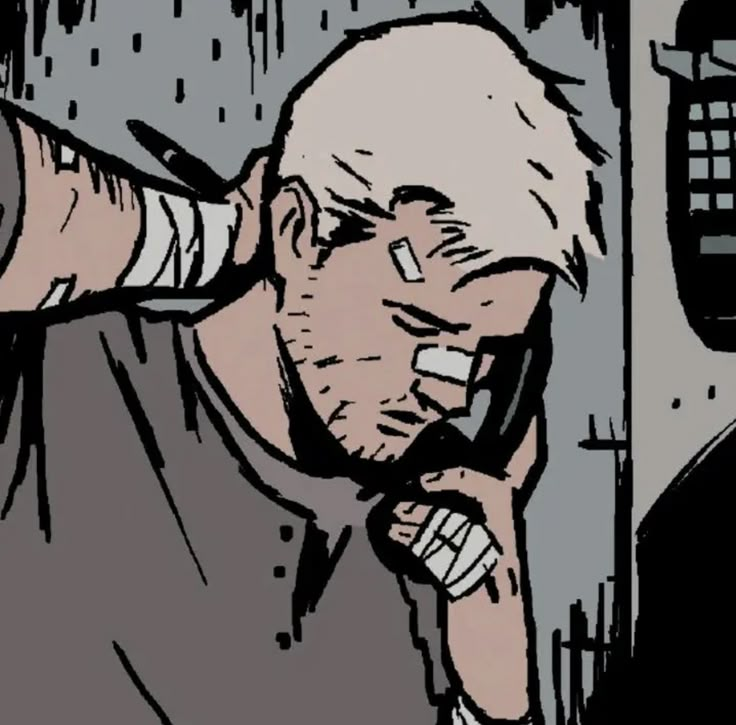